## 예제 데이터 세트

### 분류 또는 회귀용 데이터 세트

| API | 설명 |
|-----|------|
| `datasets.load_boston()` | 미국 보스턴의 집에 대한 특징과 가격 데이터 (회귀용) |
| `datasets.load_breast_cancer()` | 위스콘신 유방암 특징들과 악성/음성 레이블 데이터 (분류용) |
| `datasets.load_diabetes()` | 당뇨 데이터 (회귀용) |
| `datasets.load_digits()` | 0에서 9까지 숫자 이미지 픽셀 데이터 (분류용) |
| `datasets.load_iris()` | 붓꽃에 대한 특징을 가진 데이터 (분류용) |

### 예제 데이터 세트 구조

* 일반적으로 딕셔너리 형태로 구성
* data: 특징 데이터 세트
* target: 분류용은 레이블 값, 회귀용은 숫자 결과값 데이터
* target_names: 개별 레이블의 이름 (분류용)
* feature_names: 특징 이름
* DESCR: 데이터 세트에 대한 설명과 각 특징 설명

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()

In [ ]:
print(wine.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [ ]:
print(wine.data)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [ ]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [ ]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## `model_selection` 모듈

### `train_test_split()`: 학습/테스트 데이터 세트 분리

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data,wine.target,test_size = 0.3)

model = LinearRegression()
model.fit(X_train, y_train)

print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9135667961085029
평가 데이터 점수 : 0.8367903002471214


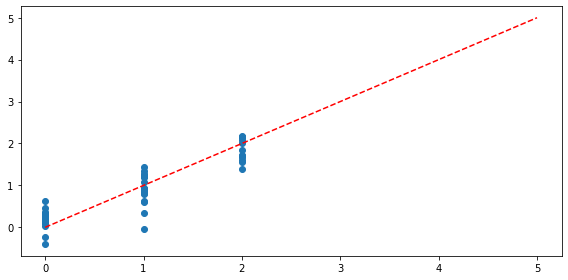

In [ ]:
import matplotlib.pyplot as plt

predicted = model.predict(X_test)
expected = y_test
plt.figure(figsize=(8,4))
plt.scatter(expected, predicted)
plt.plot([0,5],[0,5],'--r')
plt.tight_layout()

### `cross_val_score()`: 교차 검증

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
import numpy as np

scores = cross_val_score(model, wine.data,wine.target,cv=5)
print('교차 검증 정학도: {}'.format(scores))
print('교차 검증 정학도: {} +/- {}'.format(np.mean(scores),np.std(scores
                                                           )))

교차 검증 정학도: [0.         0.51460008 0.         0.40252695 0.        ]
교차 검증 정학도: 0.18342540559425508 +/- 0.22742769802907667


### `GridSearchCV`: 교차 검증과 최적 하이퍼 파라미터 찾기

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_val_score(model, wine.data,wine.target,cv=5)

print('교차 검증 정학도: {}'.format(scores))
print('교차 검증 정학도: {} +/- {}'.format(np.mean(scores),np.std(scores
                                                           )))

교차 검증 정학도: [0.         0.51460008 0.         0.40252695 0.        ]
교차 검증 정학도: 0.18342540559425508 +/- 0.22742769802907667


* `multiprocessing`을 이용한 `GridSearchCV`

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import pandas as pd

alpha = [0.001,0.01,0.1,1,10,100,1000]
param_grid = dict(alpha=alpha)

gs = GridSearchCV(estimator=Ridge(),param_grid = param_grid,cv=10)
result = gs.fit(wine.data,wine.target)

print('최적 점수 : {}'.format(result.best_score_))
print('최적 파라미터 : {}'.format(result.best_params_))
print(gs.best_estimator_)

pd.DataFrame(result.cv_results_)

최적 점수 : 0.06069779175986423
최적 파라미터 : {'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000566,0.000299,0.000460,0.000130,0.001,{'alpha': 0.001},0.0,0.0,0.0,0.541416,0.0,0.0,0.0,0.045973,0.0,0.0,0.058739,0.161475,2
1,0.000444,0.000028,0.000419,0.000015,0.01,{'alpha': 0.01},0.0,0.0,0.0,0.541492,0.0,0.0,0.0,0.045766,0.0,0.0,0.058726,0.161499,3
2,0.000441,0.000027,0.000403,0.000017,0.1,{'alpha': 0.1},0.0,0.0,0.0,0.542322,0.0,0.0,0.0,0.043819,0.0,0.0,0.058614,0.161765,4
3,0.000435,0.000024,0.000398,0.000025,1,{'alpha': 1},0.0,0.0,0.0,0.553611,0.0,0.0,0.0,0.031288,0.0,0.0,0.058490,0.165304,5
4,0.000503,0.000091,0.000468,0.000064,10,{'alpha': 10},0.0,0.0,0.0,0.631005,0.0,0.0,0.0,-0.024027,0.0,0.0,0.060698,0.190237,1
5,0.000432,0.000027,0.000408,0.000039,100,{'alpha': 100},0.0,0.0,0.0,0.739743,0.0,0.0,0.0,-0.494308,0.0,0.0,0.024543,0.280274,6
6,0.000420,0.000018,0.000406,0.000026,1000,{'alpha': 1000},0.0,0.0,0.0,0.615519,0.0,0.0,0.0,-1.888748,0.0,0.0,-0.127323,0.615152,7


## `preprocessing` 데이터 전처리 모듈

### `StandardScaler`: 표준화 클래스

In [ ]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_df)
wine_df_scaled = pd.DataFrame(data=wine_scaled, columns=wine.feature_names)
wine_df_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.841418e-15,2.444986e-16,-4.059175e-15,-7.110417e-17,-2.494883e-17,-1.955365e-16,9.443133e-16,-4.178929e-16,-1.540590e-15,-4.129032e-16,1.398382e-15,2.126888e-15,-6.985673e-17
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [ ]:
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test = train_test_split(wine_df_scaled,wine.target,test_size=0.3)

model = LogisticRegression()
model.fit(X_train,y_train)

print('훈련 데이터 점수: {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test,y_test)))

훈련 데이터 점수: 1.0
평가 데이터 점수: 0.9814814814814815


### `MinMaxScaler`: 정규화 클래스

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
wine_scaled = scaler.fit_transform(wine_df)
wine_df_scaled = pd.DataFrame(data=wine_scaled,columns=wine.feature_names)
wine_df_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(wine_df_scaled,wine.target,test_size=0.3)

model = LogisticRegression()
model.fit(X_train,y_train)

print('훈련 데이터 점수: {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test,y_test)))

훈련 데이터 점수: 0.9919354838709677
평가 데이터 점수: 0.9814814814814815
